In [60]:
%matplotlib notebook
#dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import censusdata
import uszipcode
import csv
import json
import gmaps

#import csv file to narrow data search
collegeR = "./resources_Brendan/collegeRanksCSV.csv"

# Census API Key
from goober import (api_key, gkey) 
c = Census(api_key, year=2009)

In [61]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [62]:
census_data = []
for year in years:
    c = Census(api_key, year=year)
    data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E","B01002_001E",
                          "B19301_001E",
                          "B17001_002E"
              ), {'for': 'state:*'})
    df= pd.DataFrame(data)
    df["census_year"]= year
    census_data.append(df)

In [63]:
print(census_data)

[    B01002_001E  B01003_001E  B17001_002E  B19013_001E  B19301_001E  \
0          32.7     683142.0      64038.0      64635.0      29382.0   
1          37.2    4633360.0     757833.0      41216.0      22732.0   
2          36.9    2838143.0     488788.0      38542.0      20977.0   
3          34.8    6324865.0     914040.0      50296.0      25203.0   
4          34.6   36308527.0    4694423.0      60392.0      29020.0   
5          35.5    4843211.0     563574.0      56222.0      29679.0   
6          39.0    3494487.0     295608.0      67721.0      36468.0   
7          35.4     588433.0     102142.0      56519.0      40846.0   
8          37.8     863832.0      88505.0      57618.0      28935.0   
9          39.7   18222420.0    2346946.0      47450.0      26503.0   
10         34.5    9497667.0    1384518.0      49466.0      25098.0   
11         37.5    1280241.0     117745.0      64661.0      28662.0   
12         37.9    2978880.0     326922.0      48052.0      25060.0   
13   

In [64]:
df = pd.concat(census_data)
df.head()

,B01002_001E,B01003_001E,B17001_002E,B19013_001E,B19301_001E,NAME,state,census_year
0,32.7,683142.0,64038.0,64635.0,29382.0,Alaska,02,2009
1,37.2,4633360.0,757833.0,41216.0,22732.0,Alabama,01,2009
2,36.9,2838143.0,488788.0,38542.0,20977.0,Arkansas,05,2009
3,34.8,6324865.0,914040.0,50296.0,25203.0,Arizona,04,2009
4,34.6,36308527.0,4694423.0,60392.0,29020.0,California,06,2009


In [65]:
#ranking = pd.read_csv(collegeR)
#print(ranking)

In [66]:
c.acs5#Yay nothing is broken!

In [67]:
# Use Census Search to retrieve data on all states
#c_pd = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
#                          "B19301_001E",
#                         "B17001_002E",
#                   "B17001_002E"
#               ), {'for': 'state:*'})

In [68]:
#c_pd

In [69]:
# Convert to DataFrame
#c_pd = pd.DataFrame(c_pd)

In [70]:
# Column Reordering
df = df.rename(columns={"B01003_001E": "Population",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "state": "State"})

In [71]:
# Final DataFrame
df = df[["State", "Name", "Population", "Household Income",
                       "Per Capita Income", "Poverty Count", "census_year"]]

df

,State,Name,Population,Household Income,Per Capita Income,Poverty Count,census_year
0,02,Alaska,683142.0,64635.0,29382.0,64038.0,2009
1,01,Alabama,4633360.0,41216.0,22732.0,757833.0,2009
2,05,Arkansas,2838143.0,38542.0,20977.0,488788.0,2009
3,04,Arizona,6324865.0,50296.0,25203.0,914040.0,2009
4,06,California,36308527.0,60392.0,29020.0,4694423.0,2009
5,08,Colorado,4843211.0,56222.0,29679.0,563574.0,2009
6,09,Connecticut,3494487.0,67721.0,36468.0,295608.0,2009
7,11,District of Columbia,588433.0,56519.0,40846.0,102142.0,2009
8,10,Delaware,863832.0,57618.0,28935.0,88505.0,2009
9,12,Florida,18222420.0,47450.0,26503.0,2346946.0,2009


In [72]:
hhi = df['Household Income']
city = df['census_year']
pvc = df['Poverty Count']



<IPython.core.display.Javascript object>


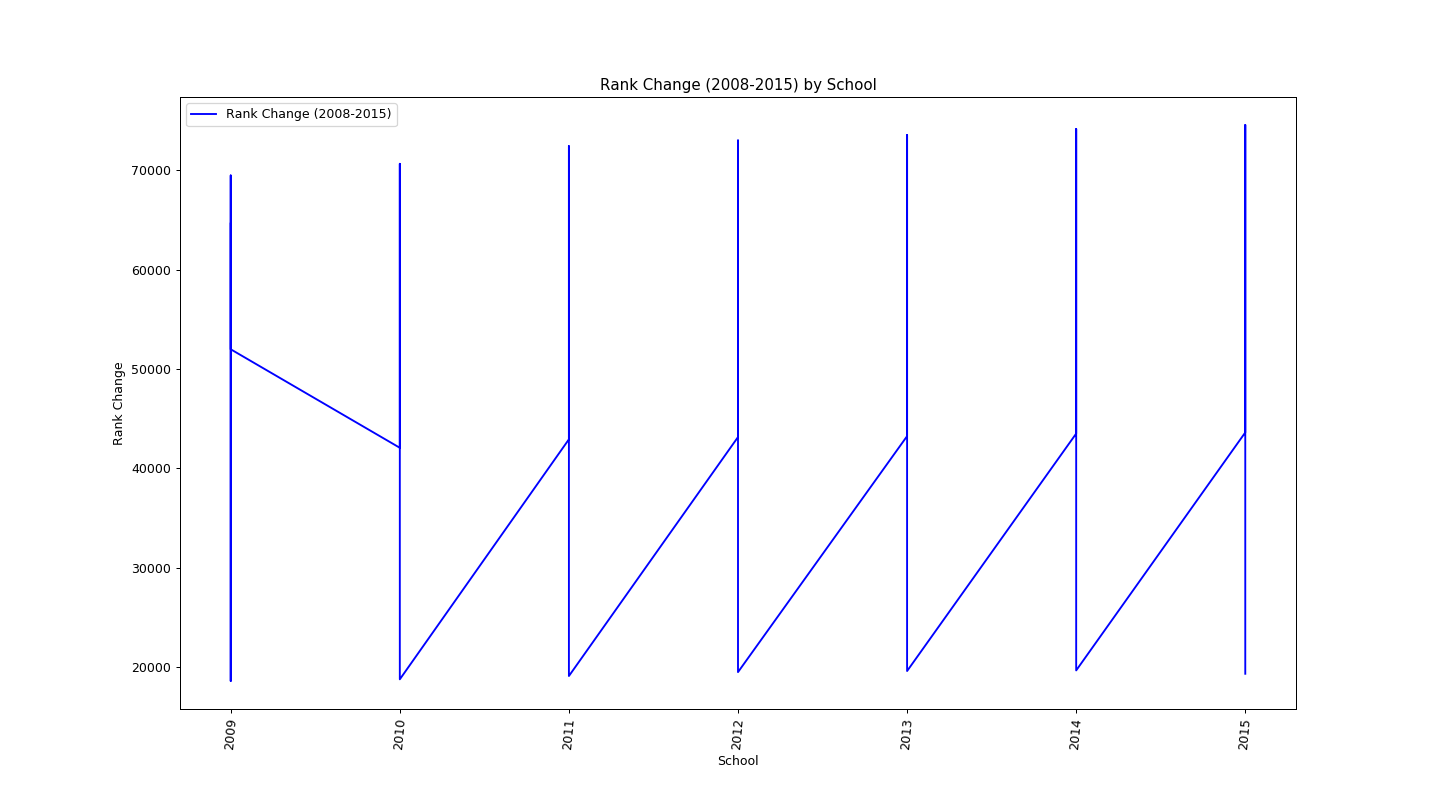

Text(0.5,0,'School')

In [73]:
plt.plot(city, hhi, color="blue", label="Rank Change (2008-2015)" )
plt.legend()
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = [16,9]
plt.title("Rank Change (2008-2015) by School")
plt.ylabel("Rank Change")
plt.xlabel("School")